In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/content/cardio_train.csv',delimiter=';')

In [3]:
# Data Preprocessing
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
X = df.drop(columns=['cardio'])  # Features
y = df['cardio']  # Target variable


In [4]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


SVM Accuracy: 0.7299
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

[[5324 1664]
 [2118 4894]]

KNN Accuracy: 0.6260
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      6988
           1       0.63      0.61      0.62      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000

[[4455 2533]
 [2703 4309]]

Decision Tree Accuracy: 0.6313
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      6988
           1       0.63      0.64      0.63      7012

    accuracy                           0.63     1400

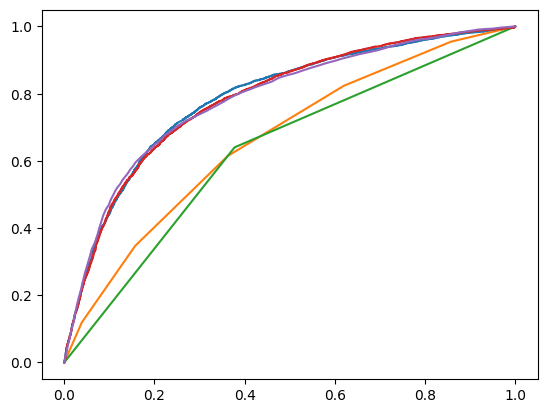

In [5]:
# Model Training and Evaluation
models = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'\n{name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


Best performing model: SVM with accuracy 0.7299


<ipython-input-6-ef7fba8023ae>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


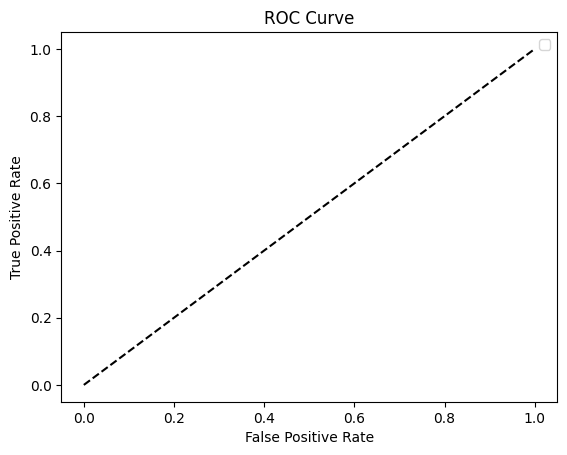

In [6]:
# Best Model Selection
best_model = max(results, key=results.get)
print(f'Best performing model: {best_model} with accuracy {results[best_model]:.4f}')

# ROC Curve Visualization
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
